/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 569.1992 - val_loss: 513.0120
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 459.9094 - val_loss: 368.7384
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 316.8437 - val_loss: 172.3827
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 130.0596 - val_loss: 68.1733
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.2155 - val_loss: 51.2399
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.5733 - val_loss: 47.1348
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.7617 - val_loss: 43.7455
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.9118 - val_loss: 42.2110
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.6289 - val_loss: 39.7885
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.6675 - val_loss: 37.8904
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.0808 - val_loss: 36.7470
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━

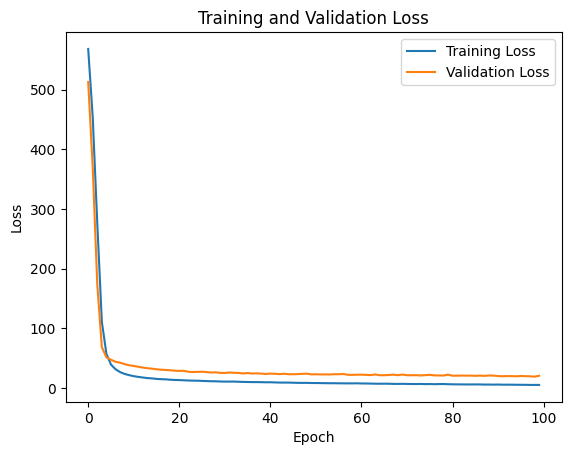

Sample Prediction Output:
Sample 1
Predicted Price: 27.968447
Actual Price: 23.6

Sample 2
Predicted Price: 35.147038
Actual Price: 32.4

Sample 3
Predicted Price: 14.64139
Actual Price: 13.6

Sample 4
Predicted Price: 24.628708
Actual Price: 22.8

Sample 5
Predicted Price: 14.7044735
Actual Price: 16.1

Sample 6
Predicted Price: 19.872707
Actual Price: 20.0

Sample 7
Predicted Price: 17.041822
Actual Price: 17.8

Sample 8
Predicted Price: 14.396549
Actual Price: 14.0

Sample 9
Predicted Price: 25.779947
Actual Price: 19.6

Sample 10
Predicted Price: 18.457281
Actual Price: 16.8



In [ ]:
#Practical No 4
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Load the Boston Housing dataset
boston = fetch_openml(name='boston')
X, y = boston.data, boston.target
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Define the neural network architecture
model = tf.keras.Sequential([
tf.keras.layers.Dense(64, activation='relu',
input_shape=(X_train.shape[1],)),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(1) # Output layer with one neuron for regression
])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16,
validation_split=0.1)
# Make predictions
y_pred = model.predict(X_test)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Visualize training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Sample Prediction Output:")
for i in range(min(10, len(y_test))): # Ensure we don't exceed the lengthof y_test
   print("Sample", i+1)
   print("Predicted Price:", y_pred[i][0]) # Access the predicted price (assuming y_pred is a 2D array)
   print("Actual Price:", y_test.iloc[i])
   print() # Add empty line for separation